# Olympics Database
## PART 2 - Exploratory analysis<br>PART 2 - Analyse exploratoire
#### ENG<br>Start with importing the libraries needed<br>And then upload the data

#### FR<br>Commençons par importer les librairies que nous allons utiliser<br>Puis téléchargeons la base de données

In [63]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import plotly.express as px

%matplotlib inline
%reload_ext autoreload
%autoreload 2

In [64]:
url = 'https://raw.githubusercontent.com/SportsScience-with-RL/Olympics/main/summer_arranged.csv'
df_main = pd.read_csv(url, index_col=0)

df_main

,Year,City,Sport,Discipline,Athlete,Country,Gender,Event,Medal
0,1896,Athens,Aquatics,Swimming,"HAJOS, Alfred",HUN,Men,100M Freestyle,Gold
1,1896,Athens,Aquatics,Swimming,"HERSCHMANN, Otto",AUT,Men,100M Freestyle,Silver
2,1896,Athens,Aquatics,Swimming,"DRIVAS, Dimitrios",GRE,Men,100M Freestyle For Sailors,Bronze
3,1896,Athens,Aquatics,Swimming,"MALOKINIS, Ioannis",GRE,Men,100M Freestyle For Sailors,Gold
4,1896,Athens,Aquatics,Swimming,"CHASAPIS, Spiridon",GRE,Men,100M Freestyle For Sailors,Silver
...,...,...,...,...,...,...,...,...,...
31158,2012,London,Wrestling,Wrestling Freestyle,"JANIKOWSKI, Damian",POL,Men,Wg 84 KG,Bronze
31159,2012,London,Wrestling,Wrestling Freestyle,"REZAEI, Ghasem Gholamreza",IRI,Men,Wg 96 KG,Gold
31160,2012,London,Wrestling,Wrestling Freestyle,"TOTROV, Rustam",RUS,Men,Wg 96 KG,Silver
31161,2012,London,Wrestling,Wrestling Freestyle,"ALEKSANYAN, Artur",ARM,Men,Wg 96 KG,Bronze


#### ENG<br>Explore the data

#### FR<br>Explorons les données

<AxesSubplot:xlabel='Year', ylabel='Count'>

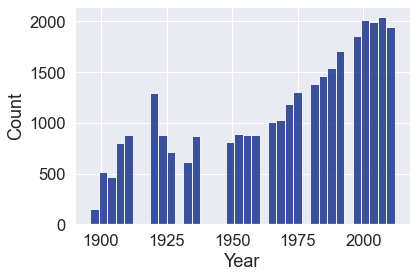

In [65]:
#Start with histogram plot
#Commençons par des histogrammes
sns.histplot(df_main['Year'])

<AxesSubplot:xlabel='Count', ylabel='Country'>

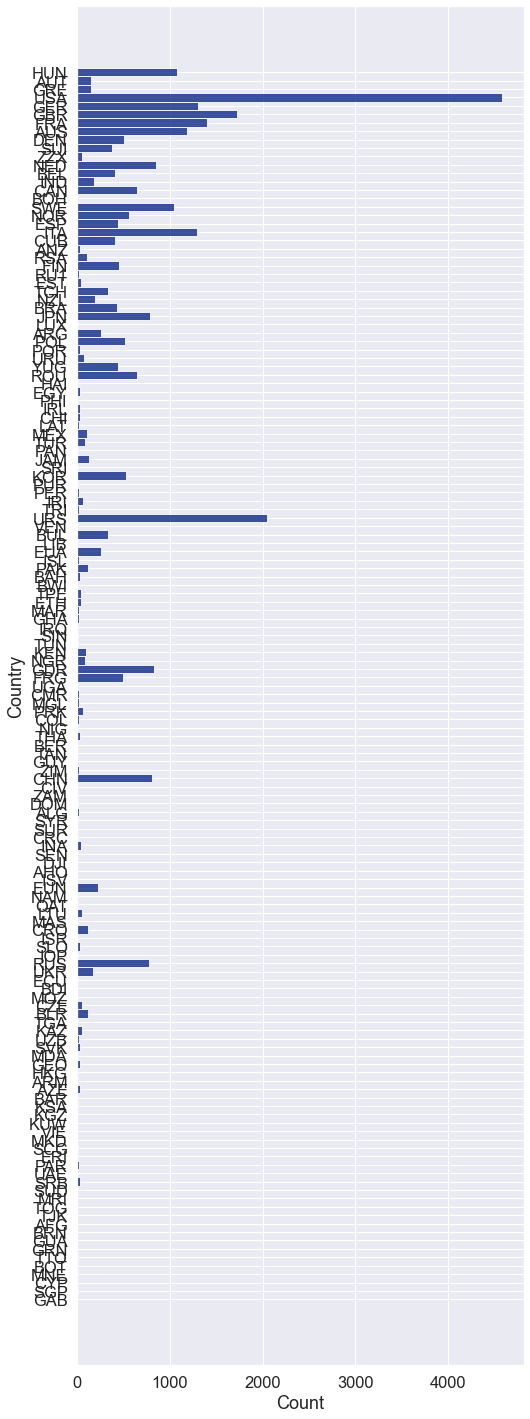

In [66]:
plt.figure(figsize=(8,25))
sns.histplot(data=df_main, y='Country')

In [67]:
#We can adjust the EDA by dropping countries with few medals
#As we see on the 'country' histplot there is a lot of countries to drop
#Nous pouvons affiner l'exploration en écartant les pays sous représentés en termes de médailles
#Comme nous pouvons le voir sur l'histogramme 'country', il y a beaucoup de pays sous représentés

In [68]:
ctrs_gb = df_main.groupby('Country').count().sort_values(by='Medal', ascending=False)
#Keep top 10 countries
#Gardons les 10 meilleurs pays
top10 = ctrs_gb.head(10).index
top10

Index(['USA', 'URS', 'GBR', 'FRA', 'GER', 'ITA', 'AUS', 'HUN', 'SWE', 'NED'], dtype='object', name='Country')

In [69]:
df_top10 = df_main[df_main.Country.isin(top10)].copy().reset_index(drop=True)

In [70]:
df_top10

,Year,City,Sport,Discipline,Athlete,Country,Gender,Event,Medal
0,1896,Athens,Aquatics,Swimming,"HAJOS, Alfred",HUN,Men,100M Freestyle,Gold
1,1896,Athens,Aquatics,Swimming,"HAJOS, Alfred",HUN,Men,1200M Freestyle,Gold
2,1896,Athens,Athletics,Athletics,"LANE, Francis",USA,Men,100M,Bronze
3,1896,Athens,Athletics,Athletics,"SZOKOLYI, Alajos",HUN,Men,100M,Bronze
4,1896,Athens,Athletics,Athletics,"BURKE, Thomas",USA,Men,100M,Gold
...,...,...,...,...,...,...,...,...,...
16509,2012,London,Wrestling,Wrestling Freestyle,"EUREN, Johan",SWE,Men,Wg 120 KG,Bronze
16510,2012,London,Wrestling,Wrestling Freestyle,"MODOS, Peter",HUN,Men,Wg 55 KG,Bronze
16511,2012,London,Wrestling,Wrestling Freestyle,"LORINCZ, Tamas",HUN,Men,Wg 66 KG,Silver
16512,2012,London,Wrestling,Wrestling Freestyle,"GUENOT, Steeve",FRA,Men,Wg 66 KG,Bronze


In [71]:
#Now let's explore the top 10 over different features
#A présent explorons ce top 10 avec plusieurs variables
df_top10['Medal_count'] = df_top10.groupby('Country')['Medal'].transform('count')
df_top10 = df_top10.join(pd.get_dummies(df_top10['Medal'], prefix='Medal'))

In [72]:
df_top10['Medal_Bronze'] = df_top10.groupby('Country')['Medal_Bronze'].transform('sum').astype('int')
df_top10['Medal_Silver'] = df_top10.groupby('Country')['Medal_Silver'].transform('sum').astype('int')
df_top10['Medal_Gold'] = df_top10.groupby('Country')['Medal_Gold'].transform('sum').astype('int')
df_top10

,Year,City,Sport,Discipline,Athlete,Country,Gender,Event,Medal,Medal_count,Medal_Bronze,Medal_Gold,Medal_Silver
0,1896,Athens,Aquatics,Swimming,"HAJOS, Alfred",HUN,Men,100M Freestyle,Gold,1079,351,412,316
1,1896,Athens,Aquatics,Swimming,"HAJOS, Alfred",HUN,Men,1200M Freestyle,Gold,1079,351,412,316
2,1896,Athens,Athletics,Athletics,"LANE, Francis",USA,Men,100M,Bronze,4585,1098,2235,1252
3,1896,Athens,Athletics,Athletics,"SZOKOLYI, Alajos",HUN,Men,100M,Bronze,1079,351,412,316
4,1896,Athens,Athletics,Athletics,"BURKE, Thomas",USA,Men,100M,Gold,4585,1098,2235,1252
...,...,...,...,...,...,...,...,...,...,...,...,...,...
16509,2012,London,Wrestling,Wrestling Freestyle,"EUREN, Johan",SWE,Men,Wg 120 KG,Bronze,1044,328,349,367
16510,2012,London,Wrestling,Wrestling Freestyle,"MODOS, Peter",HUN,Men,Wg 55 KG,Bronze,1079,351,412,316
16511,2012,London,Wrestling,Wrestling Freestyle,"LORINCZ, Tamas",HUN,Men,Wg 66 KG,Silver,1079,351,412,316
16512,2012,London,Wrestling,Wrestling Freestyle,"GUENOT, Steeve",FRA,Men,Wg 66 KG,Bronze,1396,497,408,491


Text(0.5, 1.0, 'Top 10 Countries by Medals')

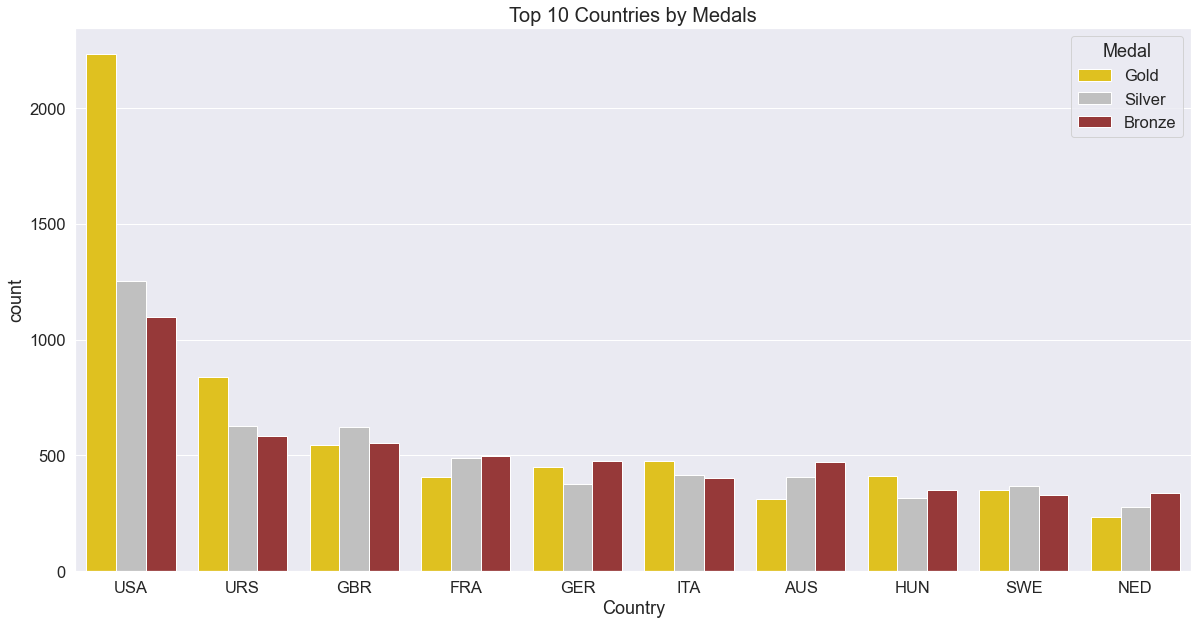

In [73]:
plt.figure(figsize=(20, 10))
sns.set(font_scale=1.5, palette= "dark")
sns.countplot(x='Country', data=df_top10, hue='Medal', order=top10, hue_order=['Gold', 'Silver', 'Bronze'],
              palette = ['gold', 'silver', 'brown'])
plt.title("Top 10 Countries by Medals", fontsize = 20)

Text(0.5, 1.0, 'Top 10 Countries by Gender')

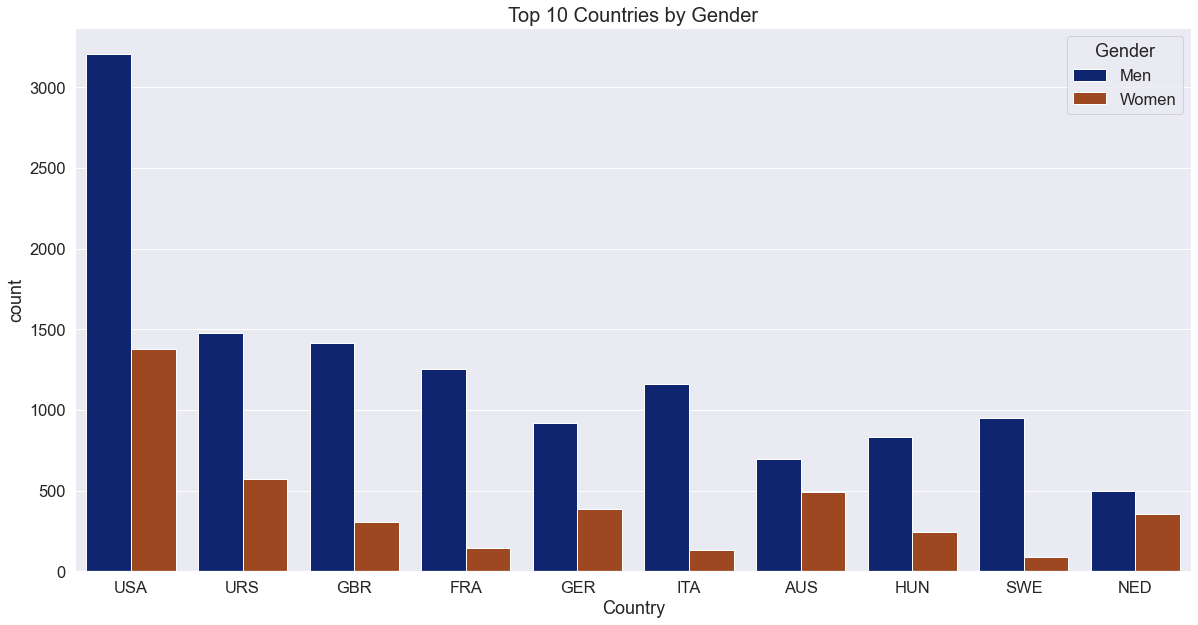

In [74]:
plt.figure(figsize=(20, 10))
sns.set(font_scale=1.5, palette= "dark")
sns.countplot(x='Country', data=df_top10, hue='Gender', order=top10)
plt.title("Top 10 Countries by Gender", fontsize = 20)

Text(0.5, 0.98, 'Top 10 Countries by Gender by Medals')

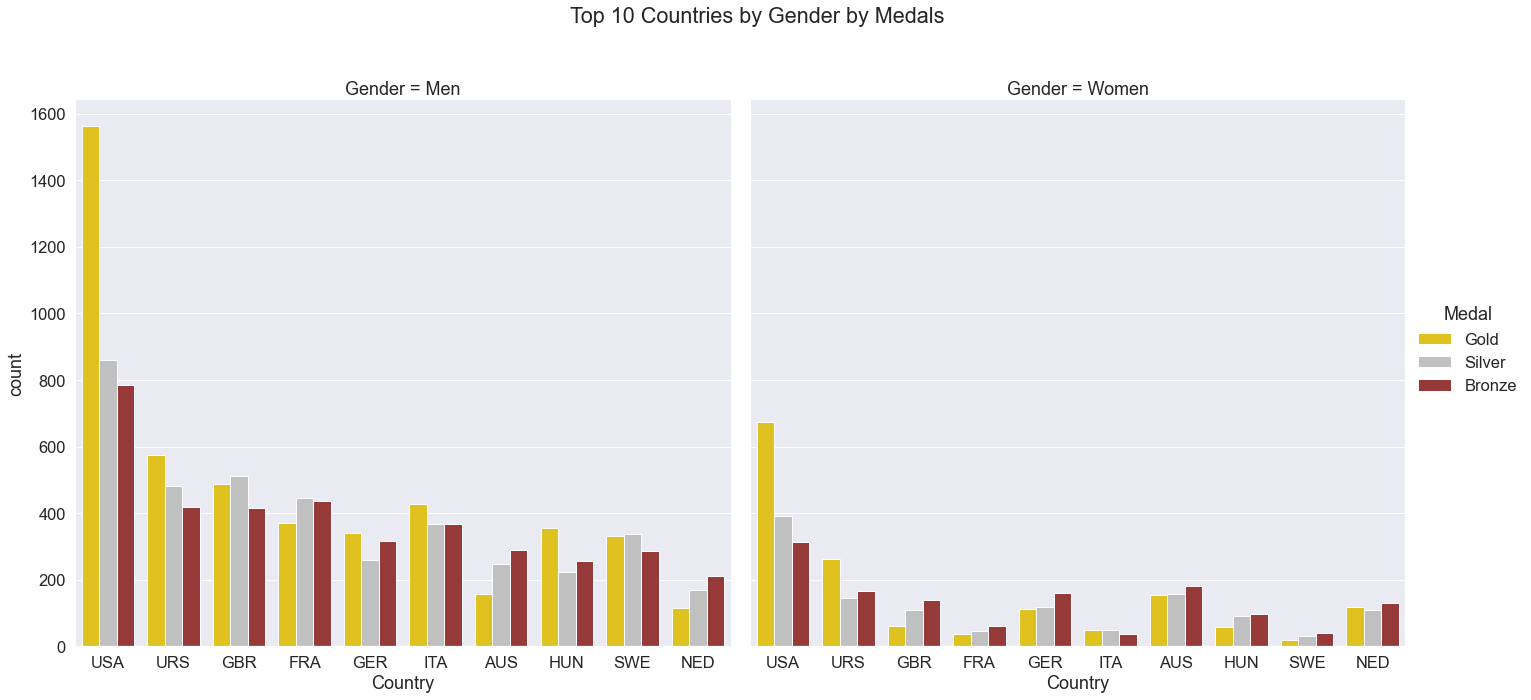

In [75]:
sns.set(font_scale=1.5, palette= "dark")
sns.catplot(data=df_top10, x='Country', hue='Medal', order=top10, hue_order=['Gold', 'Silver', 'Bronze'],
            palette = ['gold', 'silver', 'brown'], kind='count', col='Gender', height=10)
plt.subplots_adjust(top=0.85)
plt.suptitle('Top 10 Countries by Gender by Medals')

In [76]:
#Let's see the variation of Medals over the Olympics
#Voyons la variation de médailles gagnées entre chaque Olympiade

In [77]:
#Also due to historics events we have some messy data so we will explore data from 1990
#Dû aux évènements historiques nous avons quelques données 'disproportionnées' donc garderons donc seulement depuis 1990

In [78]:
df_top10_20s = df_top10[df_top10['Year']>=1990].copy()

In [79]:
df_top10_gb = df_top10_20s.groupby(['Country', 'Year'], as_index=False)['Medal_count'].count()

In [80]:
df_top10_gb_list = []

for c in df_top10_gb.Country.unique():
    df_sub = df_top10_gb[df_top10_gb['Country']==c].copy()
    df_sub['Medal_var'] = np.round(((df_sub['Medal_count'] - df_sub['Medal_count'].shift()) / 
                                    df_sub['Medal_count'].shift())*100)
    df_top10_gb_list.append(df_sub)

df_top10_gb = pd.concat(df_top10_gb_list)
df_top10_gb.dropna(inplace=True)

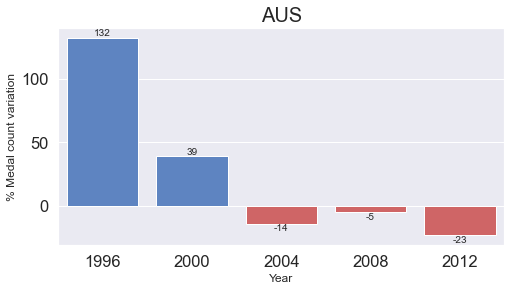

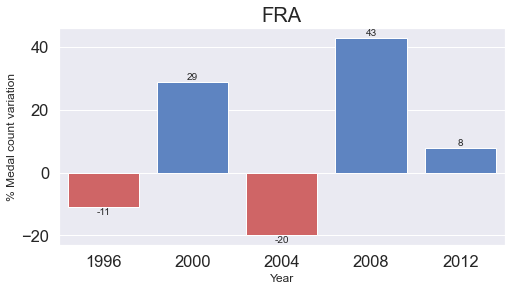

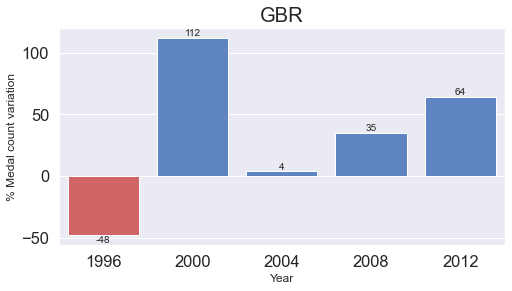

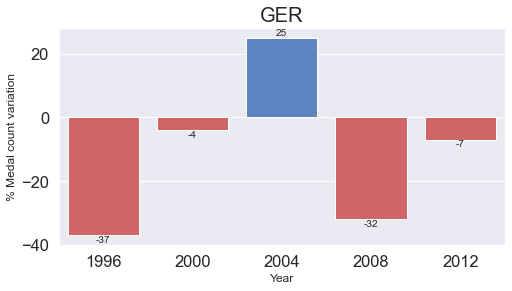

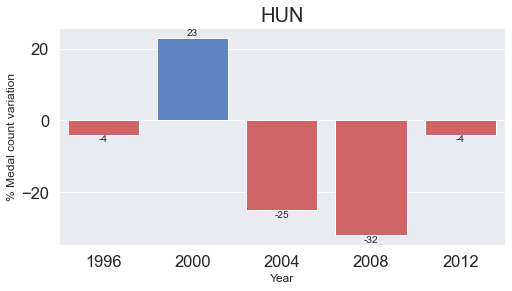

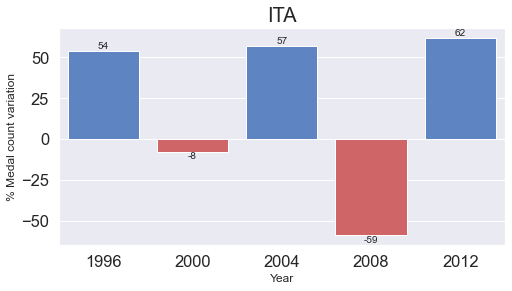

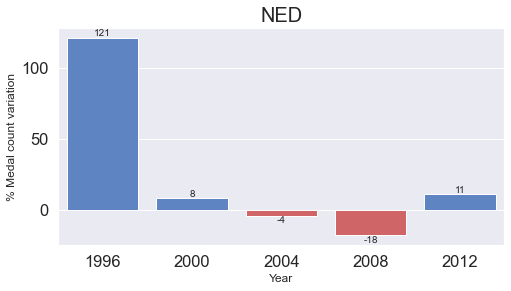

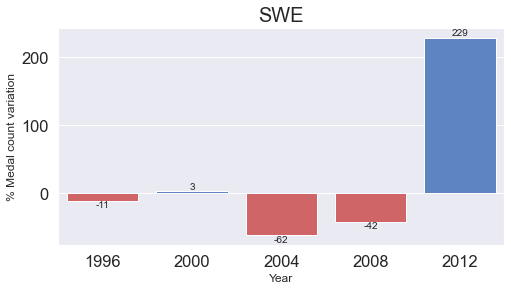

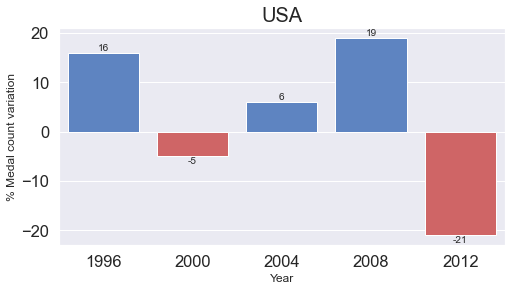

In [81]:
for c in df_top10_gb.Country.unique():
    sub_df = df_top10_gb[df_top10_gb['Country']==c].copy()
    
    palette = ['#4e80d1' if  v >= 0 else '#e15355' for v in sub_df.Medal_var]
    fig, ax = plt.subplots(figsize = (8,4)) 
    fig = sns.barplot(data=sub_df, x='Year', y='Medal_var', ci=None, palette=palette)
    
    ax.set_xlabel('Year', fontsize=12)
    ax.set_ylabel('% Medal count variation', fontsize=12)
    ax.bar_label(ax.containers[0], fontsize=10)
    
    ax.set_title(c, fontsize = 20)

In [82]:
df_top10_medal_gb = df_top10_20s.groupby(['Country', 'Year', 'Medal'], as_index=False)['Medal_count'].count()
df_top10_medal_gb

,Country,Year,Medal,Medal_count
0,AUS,1992,Bronze,16
1,AUS,1992,Gold,14
2,AUS,1992,Silver,27
3,AUS,1996,Bronze,84
4,AUS,1996,Gold,32
...,...,...,...,...
156,USA,2008,Gold,125
157,USA,2008,Silver,109
158,USA,2012,Bronze,46
159,USA,2012,Gold,147


In [83]:
df_top10_medal_gb_list = []

for c in df_top10_medal_gb.Country.unique():
    df_sub = df_top10_medal_gb[df_top10_medal_gb['Country']==c].copy()
    for m in df_sub.Medal.unique():
        df_sub_sub = df_sub[df_sub['Medal']==m].copy()
    
        df_sub_sub['Medal_var'] = np.round(((df_sub_sub['Medal_count'] - df_sub_sub['Medal_count'].shift()) / 
                                             df_sub_sub['Medal_count'].shift())*100)
        df_top10_medal_gb_list.append(df_sub_sub)

df_top10_medal_gb = pd.concat(df_top10_medal_gb_list)
df_top10_medal_gb.dropna(inplace=True)
df_top10_medal_gb.reset_index(drop=True, inplace=True)

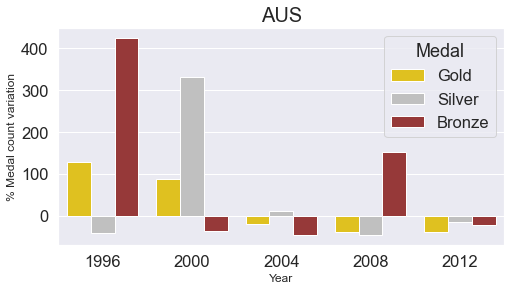

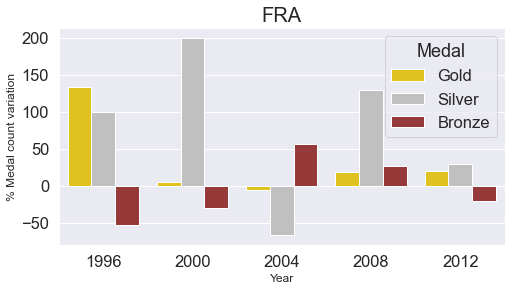

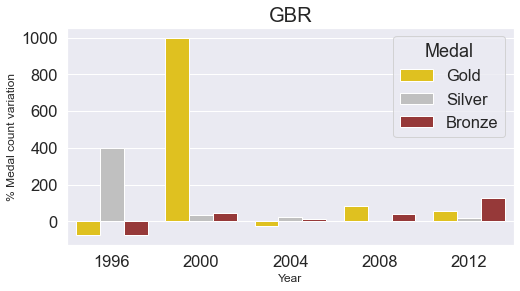

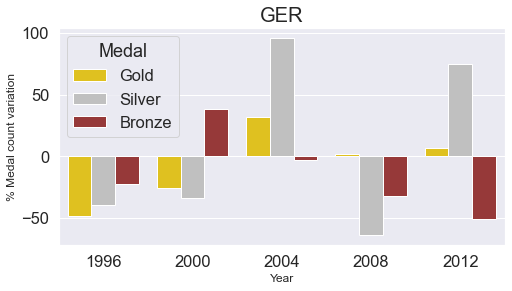

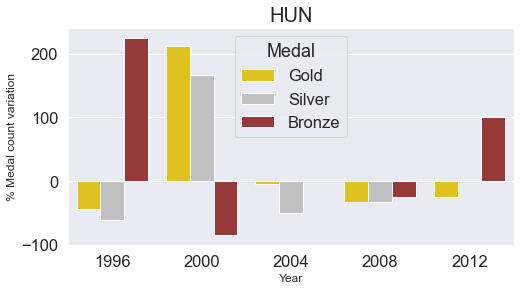

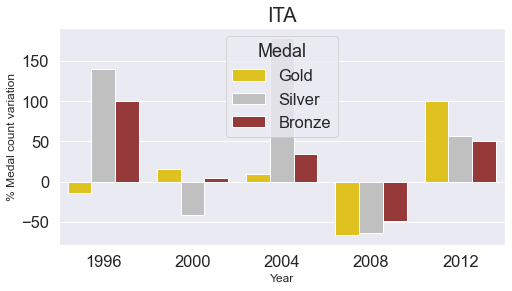

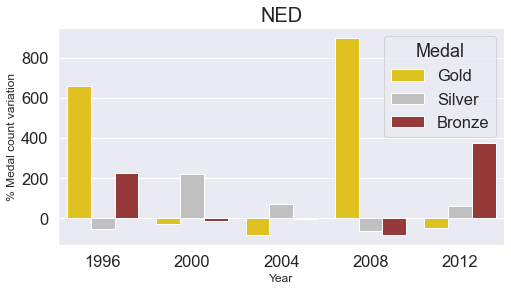

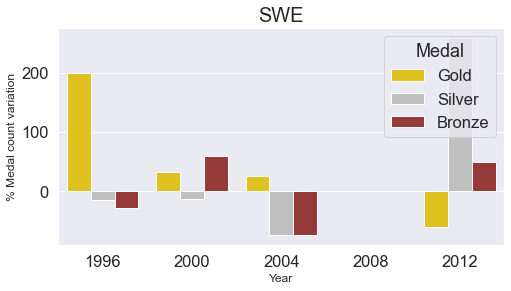

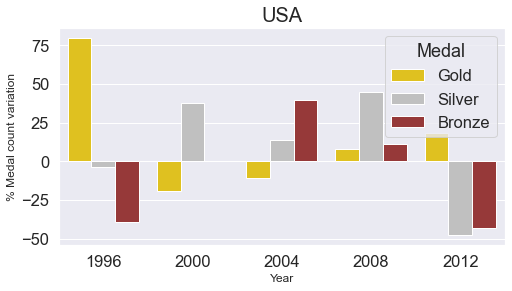

In [98]:
for c in df_top10_medal_gb.Country.unique():
    sub_df = df_top10_medal_gb[df_top10_medal_gb['Country']==c].copy()
    
    fig, ax = plt.subplots(figsize = (8,4)) 
    fig = sns.barplot(data=sub_df, x='Year', y='Medal_var', ci=None, hue='Medal', hue_order=['Gold', 'Silver', 'Bronze'],
                      palette = ['gold', 'silver', 'brown'])
    
    fig.set_xlabel('Year', fontsize=12)
    fig.set_ylabel('% Medal count variation', fontsize=12)
    
    ax.set_title(c, fontsize = 20)

In [99]:
df_top10_gender_gb = df_top10_20s.groupby(['Country', 'Year', 'Gender'], as_index=False)['Medal_count'].count()
df_top10_gender_gb

,Country,Year,Gender,Medal_count
0,AUS,1992,Men,45
1,AUS,1992,Women,12
2,AUS,1996,Men,60
3,AUS,1996,Women,72
4,AUS,2000,Men,94
...,...,...,...,...
103,USA,2004,Women,147
104,USA,2008,Men,153
105,USA,2008,Women,162
106,USA,2012,Men,88


In [100]:
df_top10_gender_gb_list = []

for c in df_top10_gender_gb.Country.unique():
    df_sub = df_top10_gender_gb[df_top10_gender_gb['Country']==c].copy()
    for g in df_sub.Gender.unique():
        df_sub_sub = df_sub[df_sub['Gender']==g].copy()
    
        df_sub_sub['Medal_var'] = np.round(((df_sub_sub['Medal_count'] - df_sub_sub['Medal_count'].shift()) / 
                                             df_sub_sub['Medal_count'].shift())*100)
        df_top10_gender_gb_list.append(df_sub_sub)

df_top10_gender_gb = pd.concat(df_top10_gender_gb_list)
df_top10_gender_gb.dropna(inplace=True)
df_top10_gender_gb.reset_index(drop=True, inplace=True)

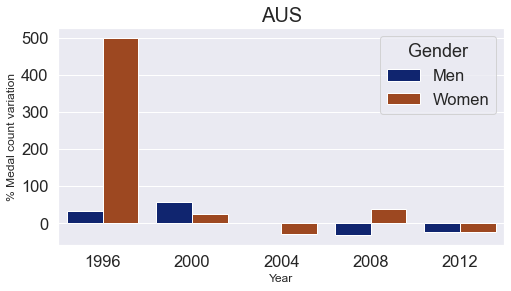

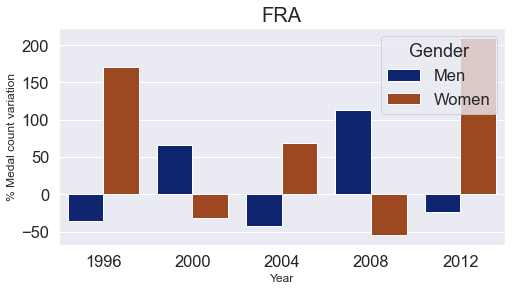

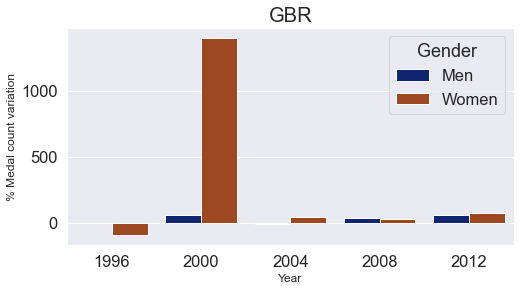

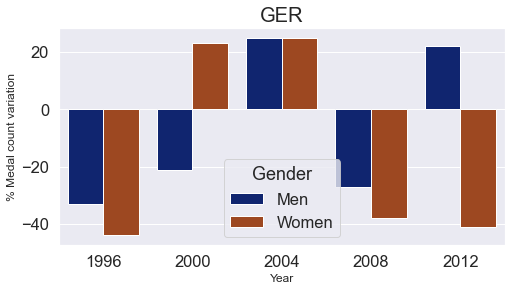

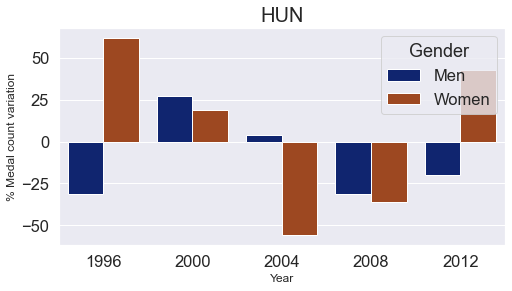

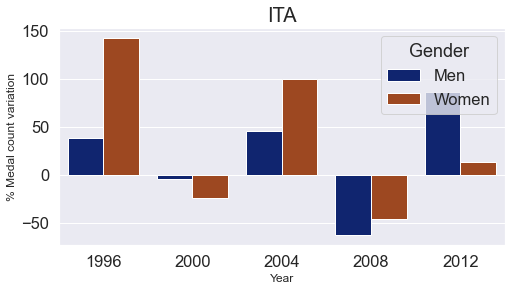

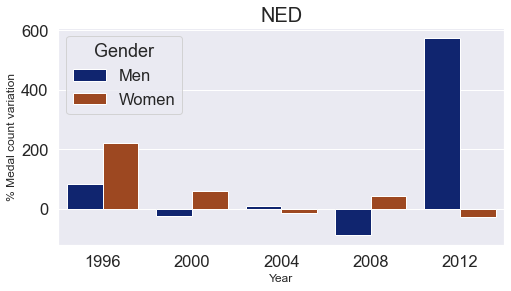

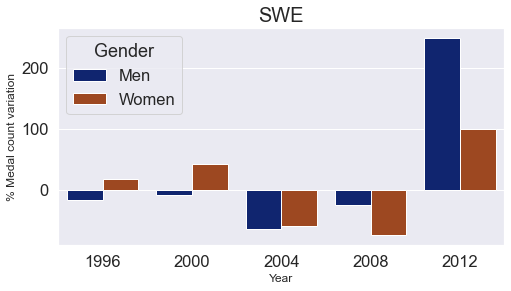

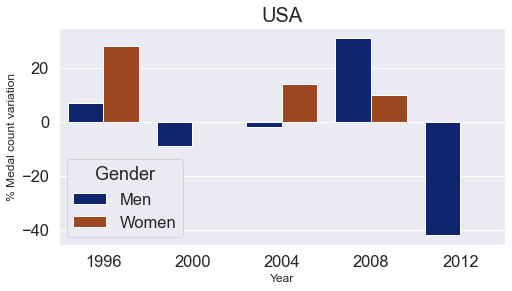

In [101]:
for c in df_top10_gender_gb.Country.unique():
    sub_df = df_top10_gender_gb[df_top10_gender_gb['Country']==c].copy()
    
    fig, ax = plt.subplots(figsize = (8,4)) 
    fig = sns.barplot(data=sub_df, x='Year', y='Medal_var', ci=None, hue='Gender')
    
    fig.set_xlabel('Year', fontsize=12)
    fig.set_ylabel('% Medal count variation', fontsize=12)
    
    ax.set_title(c, fontsize = 20)